In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
sns.set()

pd.pandas.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('data.csv')
print(data.shape)
data.head()

(30697, 25)


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [4]:
dataset = data.copy()

In [5]:
dataset = dataset.drop(['combined_shot_type', 'matchup', 'shot_id', 'team_id', 'team_name', 'game_event_id', 'game_id'], axis=1)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 18 columns):
action_type          30697 non-null object
lat                  30697 non-null float64
loc_x                30697 non-null int64
loc_y                30697 non-null int64
lon                  30697 non-null float64
minutes_remaining    30697 non-null int64
period               30697 non-null int64
playoffs             30697 non-null int64
season               30697 non-null object
seconds_remaining    30697 non-null int64
shot_distance        30697 non-null int64
shot_made_flag       25697 non-null float64
shot_type            30697 non-null object
shot_zone_area       30697 non-null object
shot_zone_basic      30697 non-null object
shot_zone_range      30697 non-null object
game_date            30697 non-null object
opponent             30697 non-null object
dtypes: float64(3), int64(7), object(8)
memory usage: 4.2+ MB


In [7]:
dataset.tail()

,action_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,opponent
30692,Jump Shot,33.9963,1,48,-118.2688,6,4,1,1999-00,5,4,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,2000-06-19,IND
30693,Tip Shot,34.0443,0,0,-118.2698,6,4,1,1999-00,5,0,NaN,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-06-19,IND
30694,Running Jump Shot,33.8783,-134,166,-118.4038,3,4,1,1999-00,28,21,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-06-19,IND
30695,Jump Shot,33.7773,31,267,-118.2388,2,4,1,1999-00,10,26,0.0,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,2000-06-19,IND
30696,Jump Shot,33.9723,1,72,-118.2688,0,4,1,1999-00,39,7,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,2000-06-19,IND


In [8]:
dataset['remain_time'] = dataset['minutes_remaining'] *60 + dataset['seconds_remaining']

In [9]:
dataset.head()

,action_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,opponent,remain_time
0,Jump Shot,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,2000-10-31,POR,627
1,Jump Shot,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,POR,622
2,Jump Shot,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,POR,465
3,Jump Shot,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,POR,412
4,Driving Dunk Shot,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,POR,379


In [10]:
from dateutil import parser

In [11]:
dataset['season'] = dataset['season'].str.slice(5,8).astype(int)

In [12]:
dataset.head()

,action_type,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,opponent,remain_time
0,Jump Shot,33.9723,167,72,-118.1028,10,1,0,1,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,2000-10-31,POR,627
1,Jump Shot,34.0443,-157,0,-118.4268,10,1,0,1,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,POR,622
2,Jump Shot,33.9093,-101,135,-118.3708,7,1,0,1,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,POR,465
3,Jump Shot,33.8693,138,175,-118.1318,6,1,0,1,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,POR,412
4,Driving Dunk Shot,34.0443,0,0,-118.2698,6,2,0,1,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,POR,379


In [13]:
dataset = dataset.drop(['minutes_remaining', 'seconds_remaining', 'game_date', 'shot_zone_range'], axis=1)

In [14]:
dataset.head()

,action_type,lat,loc_x,loc_y,lon,period,playoffs,season,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,opponent,remain_time
0,Jump Shot,33.9723,167,72,-118.1028,1,0,1,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,POR,627
1,Jump Shot,34.0443,-157,0,-118.4268,1,0,1,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,POR,622
2,Jump Shot,33.9093,-101,135,-118.3708,1,0,1,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,POR,465
3,Jump Shot,33.8693,138,175,-118.1318,1,0,1,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,POR,412
4,Driving Dunk Shot,34.0443,0,0,-118.2698,2,0,1,0,1.0,2PT Field Goal,Center(C),Restricted Area,POR,379


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
dataset['shot_zone_basic'] = le.fit_transform(dataset['shot_zone_basic'])
dataset['opponent'] = le.fit_transform(dataset['opponent'])
dataset['shot_zone_area'] = le.fit_transform(dataset['shot_zone_area'])

In [17]:
dataset.head()

,action_type,lat,loc_x,loc_y,lon,period,playoffs,season,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,opponent,remain_time
0,Jump Shot,33.9723,167,72,-118.1028,1,0,1,18,NaN,2PT Field Goal,5,4,25,627
1,Jump Shot,34.0443,-157,0,-118.4268,1,0,1,15,0.0,2PT Field Goal,3,4,25,622
2,Jump Shot,33.9093,-101,135,-118.3708,1,0,1,16,1.0,2PT Field Goal,2,4,25,465
3,Jump Shot,33.8693,138,175,-118.1318,1,0,1,22,0.0,2PT Field Goal,4,4,25,412
4,Driving Dunk Shot,34.0443,0,0,-118.2698,2,0,1,0,1.0,2PT Field Goal,1,5,25,379


In [18]:
shot_type = {'2PT Field Goal' : 2, '3PT Field Goal' : 3}
dataset['shot_type'] = dataset['shot_type'].map(shot_type)

In [19]:
dataset.head()

,action_type,lat,loc_x,loc_y,lon,period,playoffs,season,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,opponent,remain_time
0,Jump Shot,33.9723,167,72,-118.1028,1,0,1,18,NaN,2,5,4,25,627
1,Jump Shot,34.0443,-157,0,-118.4268,1,0,1,15,0.0,2,3,4,25,622
2,Jump Shot,33.9093,-101,135,-118.3708,1,0,1,16,1.0,2,2,4,25,465
3,Jump Shot,33.8693,138,175,-118.1318,1,0,1,22,0.0,2,4,4,25,412
4,Driving Dunk Shot,34.0443,0,0,-118.2698,2,0,1,0,1.0,2,1,5,25,379


In [20]:
dataset = dataset.drop(['action_type', 'shot_zone_area', 'opponent'], axis=1)
dataset.head()

,lat,loc_x,loc_y,lon,period,playoffs,season,shot_distance,shot_made_flag,shot_type,shot_zone_basic,remain_time
0,33.9723,167,72,-118.1028,1,0,1,18,NaN,2,4,627
1,34.0443,-157,0,-118.4268,1,0,1,15,0.0,2,4,622
2,33.9093,-101,135,-118.3708,1,0,1,16,1.0,2,4,465
3,33.8693,138,175,-118.1318,1,0,1,22,0.0,2,4,412
4,34.0443,0,0,-118.2698,2,0,1,0,1.0,2,5,379


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 12 columns):
lat                30697 non-null float64
loc_x              30697 non-null int64
loc_y              30697 non-null int64
lon                30697 non-null float64
period             30697 non-null int64
playoffs           30697 non-null int64
season             30697 non-null int32
shot_distance      30697 non-null int64
shot_made_flag     25697 non-null float64
shot_type          30697 non-null int64
shot_zone_basic    30697 non-null int32
remain_time        30697 non-null int64
dtypes: float64(3), int32(2), int64(7)
memory usage: 2.6 MB


In [22]:
train = dataset.dropna()

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 12 columns):
lat                25697 non-null float64
loc_x              25697 non-null int64
loc_y              25697 non-null int64
lon                25697 non-null float64
period             25697 non-null int64
playoffs           25697 non-null int64
season             25697 non-null int32
shot_distance      25697 non-null int64
shot_made_flag     25697 non-null float64
shot_type          25697 non-null int64
shot_zone_basic    25697 non-null int32
remain_time        25697 non-null int64
dtypes: float64(3), int32(2), int64(7)
memory usage: 2.4 MB


In [24]:
train.head()

,lat,loc_x,loc_y,lon,period,playoffs,season,shot_distance,shot_made_flag,shot_type,shot_zone_basic,remain_time
1,34.0443,-157,0,-118.4268,1,0,1,15,0.0,2,4,622
2,33.9093,-101,135,-118.3708,1,0,1,16,1.0,2,4,465
3,33.8693,138,175,-118.1318,1,0,1,22,0.0,2,4,412
4,34.0443,0,0,-118.2698,2,0,1,0,1.0,2,5,379
5,34.0553,-145,-11,-118.4148,3,0,1,14,0.0,2,4,572


In [25]:
test = dataset[dataset['shot_made_flag'].isnull()]

In [26]:
test = test.drop('shot_made_flag', axis=1)

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 30693
Data columns (total 11 columns):
lat                5000 non-null float64
loc_x              5000 non-null int64
loc_y              5000 non-null int64
lon                5000 non-null float64
period             5000 non-null int64
playoffs           5000 non-null int64
season             5000 non-null int32
shot_distance      5000 non-null int64
shot_type          5000 non-null int64
shot_zone_basic    5000 non-null int32
remain_time        5000 non-null int64
dtypes: float64(2), int32(2), int64(7)
memory usage: 429.7 KB


In [28]:
test.head(10)

,lat,loc_x,loc_y,lon,period,playoffs,season,shot_distance,shot_type,shot_zone_basic,remain_time
0,33.9723,167,72,-118.1028,1,0,1,18,2,4,627
7,34.0163,1,28,-118.2688,3,0,1,2,2,5,485
16,34.0443,0,0,-118.2698,1,0,1,0,2,5,1
19,34.0443,0,0,-118.2698,3,0,1,0,2,5,646
32,33.9683,163,76,-118.1068,1,0,1,17,2,4,686
33,33.8503,70,194,-118.1998,1,0,1,20,2,4,658
34,34.0253,1,19,-118.2688,1,0,1,1,2,5,453
35,34.0293,-12,15,-118.2818,1,0,1,1,2,5,358
36,34.0403,1,4,-118.2688,1,0,1,0,2,5,249
37,33.9283,-117,116,-118.3868,2,0,1,16,2,4,333


In [29]:
train = train.astype('float32')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 12 columns):
lat                25697 non-null float32
loc_x              25697 non-null float32
loc_y              25697 non-null float32
lon                25697 non-null float32
period             25697 non-null float32
playoffs           25697 non-null float32
season             25697 non-null float32
shot_distance      25697 non-null float32
shot_made_flag     25697 non-null float32
shot_type          25697 non-null float32
shot_zone_basic    25697 non-null float32
remain_time        25697 non-null float32
dtypes: float32(12)
memory usage: 1.4 MB


In [30]:
test = test.astype('float32')
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 30693
Data columns (total 11 columns):
lat                5000 non-null float32
loc_x              5000 non-null float32
loc_y              5000 non-null float32
lon                5000 non-null float32
period             5000 non-null float32
playoffs           5000 non-null float32
season             5000 non-null float32
shot_distance      5000 non-null float32
shot_type          5000 non-null float32
shot_zone_basic    5000 non-null float32
remain_time        5000 non-null float32
dtypes: float32(11)
memory usage: 253.9 KB


In [82]:
X_train = train.drop('shot_made_flag', axis=1)
y_train = train['shot_made_flag']

In [83]:
X_train.head()

,lat,loc_x,loc_y,lon,period,playoffs,season,shot_distance,shot_type,shot_zone_basic,remain_time
1,34.044300,-157.0,0.0,-118.426804,1.0,0.0,1.0,15.0,2.0,4.0,622.0
2,33.909302,-101.0,135.0,-118.370796,1.0,0.0,1.0,16.0,2.0,4.0,465.0
3,33.869301,138.0,175.0,-118.131798,1.0,0.0,1.0,22.0,2.0,4.0,412.0
4,34.044300,0.0,0.0,-118.269798,2.0,0.0,1.0,0.0,2.0,5.0,379.0
5,34.055302,-145.0,-11.0,-118.414803,3.0,0.0,1.0,14.0,2.0,4.0,572.0


In [84]:
y_train.head()

1    0.0
2    1.0
3    0.0
4    1.0
5    0.0
Name: shot_made_flag, dtype: float32

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [86]:
X_train.head()

,lat,loc_x,loc_y,lon,period,playoffs,season,shot_distance,shot_type,shot_zone_basic,remain_time
1,34.044300,-157.0,0.0,-118.426804,1.0,0.0,1.0,15.0,2.0,4.0,622.0
2,33.909302,-101.0,135.0,-118.370796,1.0,0.0,1.0,16.0,2.0,4.0,465.0
3,33.869301,138.0,175.0,-118.131798,1.0,0.0,1.0,22.0,2.0,4.0,412.0
4,34.044300,0.0,0.0,-118.269798,2.0,0.0,1.0,0.0,2.0,5.0,379.0
5,34.055302,-145.0,-11.0,-118.414803,3.0,0.0,1.0,14.0,2.0,4.0,572.0


In [87]:
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_train.head()

,lat,loc_x,loc_y,lon,period,playoffs,season,shot_distance,shot_type,shot_zone_basic,remain_time
0,1.035246,-1.491296,-1.035246,-1.491331,-1.320593,-0.413876,-0.53196,0.164339,-0.516525,0.443626,1.442489
1,-0.496208,-0.982533,0.496228,-0.982502,-1.320593,-0.413876,-0.53196,0.270852,-0.516525,0.443626,0.688794
2,-0.949988,1.188792,0.949998,1.188810,-1.320593,-0.413876,-0.53196,0.909929,-0.516525,0.443626,0.434362
3,1.035246,-0.064944,-1.035246,-0.064931,-0.452239,-0.413876,-0.53196,-1.433353,-0.516525,1.000748,0.275942
4,1.160051,-1.382275,-1.160033,-1.382301,0.416115,-0.413876,-0.53196,0.057826,-0.516525,0.443626,1.202459


In [88]:
X_test = test.copy()

In [89]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_test.head()

,lat,loc_x,loc_y,lon,period,playoffs,season,shot_distance,shot_type,shot_zone_basic,remain_time
0,0.218477,1.452259,-0.218460,1.452270,-1.320593,-0.413876,-0.53196,0.483877,-0.516525,0.443626,1.466492
1,0.717609,-0.055859,-0.717607,-0.055851,0.416115,-0.413876,-0.53196,-1.220328,-0.516525,1.000748,0.784806
2,1.035246,-0.064944,-1.035246,-0.064931,-1.320593,-0.413876,-0.53196,-1.433353,-0.516525,1.000748,-1.538687
3,1.035246,-0.064944,-1.035246,-0.064931,0.416115,-0.413876,-0.53196,-1.433353,-0.516525,1.000748,1.557704
4,0.173081,1.415919,-0.173083,1.415950,-1.320593,-0.413876,-0.53196,0.377365,-0.516525,0.443626,1.749728


In [90]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [91]:
sel_ = SelectFromModel(Lasso(alpha=0.01, random_state=0))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [92]:
select_fea = X_train.columns[sel_.get_support()]
select_fea

Index(['period', 'shot_distance', 'shot_zone_basic'], dtype='object')

In [93]:
X_val = X_train[X_train.shape[0]-5000:]
X_train = X_train[:X_train.shape[0]-5000]

In [94]:
y_val = y_train[y_train.shape[0]-5000:]
y_train = y_train[:y_train.shape[0]-5000]

In [95]:
lin_model = Lasso(alpha=0.01, random_state=0)
lin_model.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [96]:
y_pred = lin_model.predict(X_test)

In [97]:
y_pred

array([0.40987555, 0.55548819, 0.57655145, ..., 0.49210276, 0.48300605,
       0.5722467 ])

In [98]:
len(y_pred)

5000

In [99]:
submit = pd.read_csv('sample_submission.csv')

In [100]:
submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
shot_id           5000 non-null int64
shot_made_flag    5000 non-null float64
dtypes: float64(1), int64(1)
memory usage: 78.2 KB


In [101]:
submit['shot_made_flag'] = y_pred

In [102]:
submit.head()

,shot_id,shot_made_flag
0,1,0.409876
1,8,0.555488
2,17,0.576551
3,20,0.573682
4,33,0.418972


In [103]:
submit.to_csv('submit.csv', index=False)

Text(0.5,1,'Feature Importance')

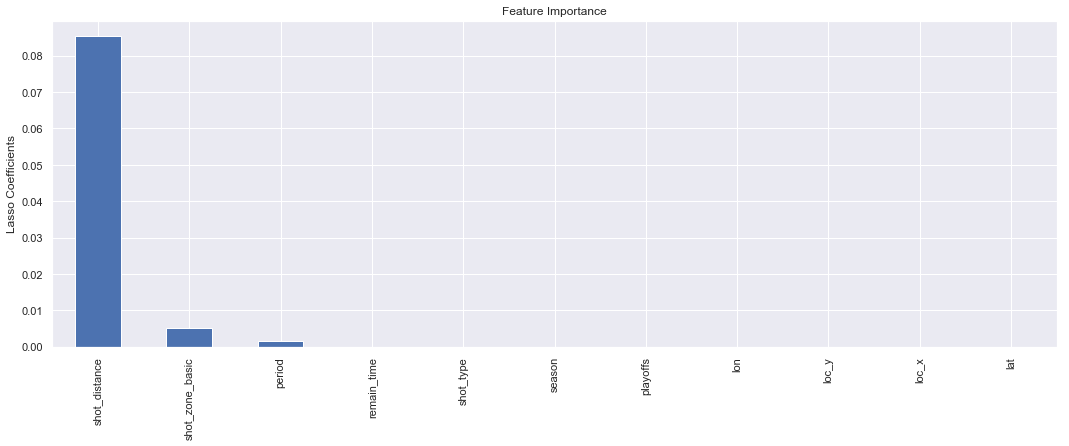

In [104]:
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = X_train.columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.pyplot.ylabel('Lasso Coefficients')
plt.pyplot.title('Feature Importance')